#### 1. Определить свой вариант по таблице в гугл-доках, с информацией о ваших успехах 
Ответ: 5
#### 2. Найти файл, относящийся к вашему варианту.
Ответ: var05.csv
#### 3. Определить тип сериализации у вашего файла, из изученных на практике и лекции.
Ответ: CSV
#### 4. Считать данные файла c помощью языка python и среды разработки Jupyter

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('var05.csv', index_col=[0])

data.head()

,jjwye,qrgto,rpnmo
0,15.554835,14.964320,19.204232
1,8.474568,17.819019,16.562395
2,24.057693,4.996934,6.197014
3,11.499164,9.928000,29.208549
4,10.570008,13.059573,9.465277


#### 5. Выполнить следующие действия:
- Найти среднее и дисперсию каждого столбца.

In [55]:
data.describe()

,jjwye,qrgto,rpnmo
count,100.000000,100.000000,100.000000
mean,9.005259,12.123232,9.880322
std,34.600332,17.837912,20.211572
min,-180.079680,-12.238944,-167.116576
25%,5.874730,5.657941,4.963393
50%,10.472084,11.332350,9.858488
75%,17.017900,17.185261,18.220572
max,151.957882,167.105561,33.714164


In [60]:
print('Среднее:')
data.mean()

Среднее:


jjwye     9.005259
qrgto    12.123232
rpnmo     9.880322
dtype: float64

In [45]:
print('Дисперсия:')
data.std()

Дисперсия:


jjwye    34.600332
qrgto    17.837912
rpnmo    20.211572
dtype: float64

- Визуализировать датасет любым удобным способом. Можно несколькими графиками.


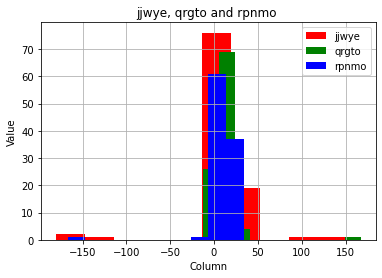

In [65]:
data['jjwye'].hist(color="red", label='jjwye')
data['qrgto'].hist(color="green", label='qrgto')
data['rpnmo'].hist(color="blue", label='rpnmo')

plt.title('jjwye, qrgto and rpnmo ')
plt.xlabel('Column')
plt.ylabel('Value')
plt.legend(loc='upper right');

- Построить графики для каждой пары признаков в наборе данных.


In [47]:
def draw_1(data):
    data['jjwye'].hist(color="red", label='jjwye')
    data['qrgto'].hist(color="green", label='qrgto')

    
def draw_2(data):
    data['jjwye'].hist(color="red", label='jjwye')
    data['rpnmo'].hist(color="blue", label='rpnmo')

    
def draw_3(data):
    data['qrgto'].hist(color="green", label='qrgto')
    data['rpnmo'].hist(color="blue", label='rpnmo')

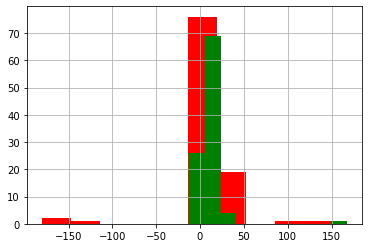

In [48]:
draw_1(data)

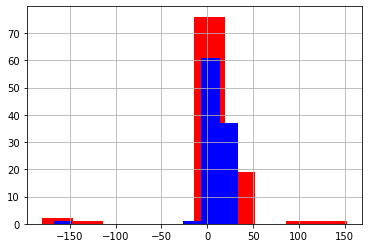

In [49]:
draw_2(data)

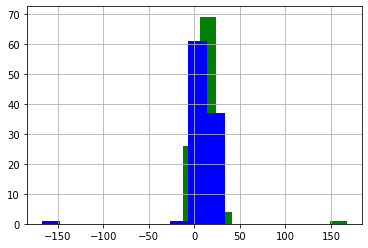

In [50]:
draw_3(data)

- Построить гистограмму каждого из признаков.


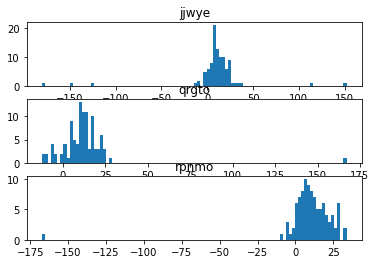

In [76]:
HIST_RANGE = 100
fig, axs = plt.subplots(len(data.columns))
i = 0
for col in data.columns:
    axs[i].hist(data[col],HIST_RANGE)
    axs[i].set_title(col)
    i += 1
    
    
# axs[0].hist(data['jjwye'], HIST_RANGE)
# axs[0].set_title('jjwye')
# axs[1].hist(data['qrgto'], HIST_RANGE)
# axs[1].set_title('qrgto')
# axs[2].hist(data['rpnmo'], HIST_RANGE)
# axs[2].set_title('rpnmo')

- Найти выбросы. Удалить их.
     Если номер варианта не четный - присвоить выбросам среднее значение.


In [85]:
new_data = data.copy()

for col in new_data.columns:
    data_std = new_data[col].std()
    data_mean = new_data[col].mean()
    cut_off = data_std * 3
    
    lower_border = data_mean - cut_off
    upper_border = data_mean + cut_off
    col_data = new_data[col]
    
    for idx in range(len(col_data)):
        if col_data[idx] > upper_border or col_data[idx] < lower_border:
            col_data[idx] = data_mean
    

jjwye    11.321324
qrgto    10.573408
rpnmo    11.650291
dtype: float64

- Найти новые средние и дисперсии, сравнить со старыми.


In [107]:
print('Старые:')
print('\tСреднее: \n',data.mean().to_string()+'\n')
print('\tДисперсия: \n',data.std().to_string()+'\n')
print('\nНовые:')
print('\tСреднее: \n',new_data.mean().to_string()+'\n')
print('\tДисперсия: \n',new_data.std().to_string()+'\n')

Старые:
	Среднее: 
 jjwye     9.005259
qrgto    12.123232
rpnmo     9.880322

	Дисперсия: 
 jjwye    34.600332
qrgto    17.837912
rpnmo    20.211572


Новые:
	Среднее: 
 jjwye    11.321324
qrgto    10.573408
rpnmo    11.650291

	Дисперсия: 
 jjwye    8.949223
qrgto    8.552394
rpnmo    9.428667



- Нормализовать данные по среднему и дисперсии.

In [110]:
normalized_data = data.copy()

normalized_data = (data-data_mean) / data_std

normalized_data.head()

,jjwye,qrgto,rpnmo
0,0.280756,0.251539,0.461315
1,-0.069552,0.392780,0.330606
2,0.701448,-0.241613,-0.182238
3,0.080095,0.002359,0.956295
4,0.034123,0.157299,-0.020535
